## DateTime Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# import datasets for this exercise
import vega_datasets
from vega_datasets import data




**1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [2]:
# import temps data frame
# NOTE: thee date column is already in datetime formate
temps = data.sf_temps()
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
# Set date column as Index and sort the index:
temps = temps.set_index('date').sort_index()
temps.head(2)

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40


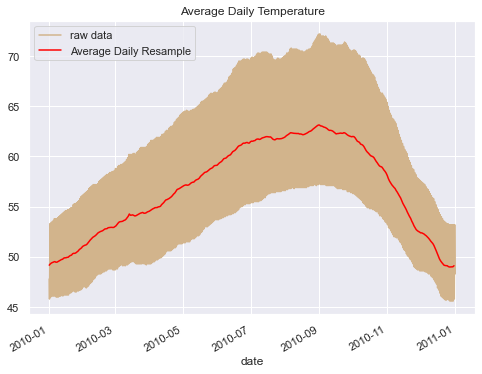

In [4]:
# visualize average temperature by day

temps.temp.plot(label = 'raw data', color = 'tan')
temps.resample('D').mean().temp.plot(label = 'Average Daily Resample', color = 'red')
plt.title('Average Daily Temperature')
plt.legend();

**2. Write the code necessary to visualize the minimum temperature over time.**

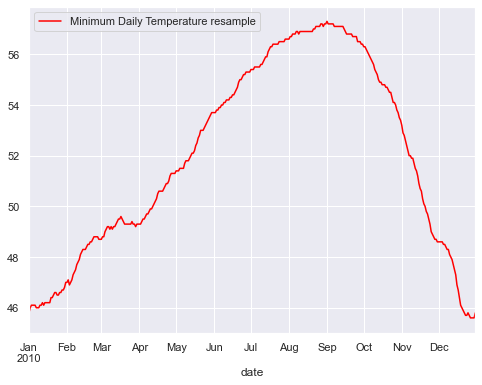

In [5]:
# visual minimum temperature by day
temps.resample('D').min().temp.plot(label = 'Minimum Daily Temperature resample', color = 'red')
plt.legend();

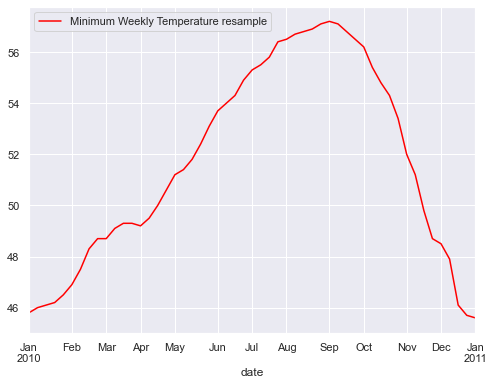

In [6]:
# visual minimum temperature by week
temps.resample('W').min().temp.plot(label = 'Minimum Weekly Temperature resample', color = 'red')
plt.legend();

**3. Write the code necessary to visualize the maximum temperature over time.**

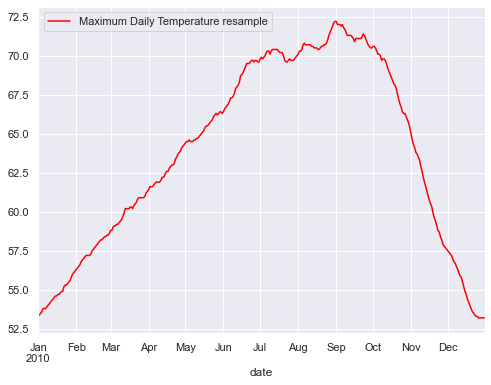

In [7]:
# visual maximum temperature by day
temps.resample('D').max().temp.plot(label = 'Maximum Daily Temperature resample', color = 'red')
plt.legend();

**4. Which month is the coldest, on average?  -- January**

In [8]:
# resample by month, using mean as aggregate
temps.resample('M').mean().sort_values(by = 'temp', ascending = True) 


,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


In [9]:
# A better way: use idxmin function to get the row label of the minimum value. 
temps.resample('M').mean().sort_values(by = 'temp', ascending = False) 

,temp
date,
2010-09-30,62.49
2010-08-31,62.41
2010-07-31,61.77
2010-06-30,60.44
2010-10-31,60.25
2010-05-31,57.97
2010-04-30,55.63
2010-11-30,55.19
2010-03-31,53.96


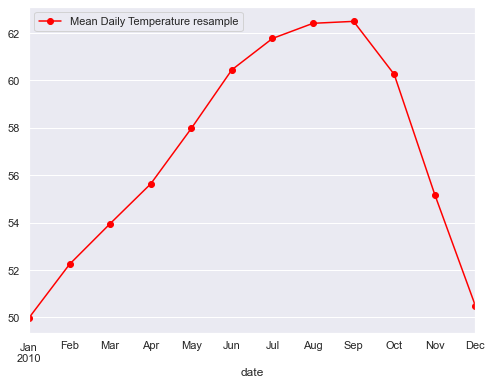

In [10]:
# visual minimum temperature by month
temps.resample('M').mean().temp.plot(label = 'Mean Daily Temperature resample', color = 'red', marker = 'o')
plt.legend();

**5. Which month has the highest average temperature?** -- September

In [11]:
# Attempt 1: use .agg to find maximum temp, then refer to df above to find month
temps.resample('M').mean().agg('max')  #September

temp   62.49
dtype: float64

In [12]:
# A better way use idxmax to get index label of the maximum mean value
temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

**6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [13]:
# Resample by day to find min and max temperatures
temps_var = temps.resample('D').agg(['min','max'])
temps_var.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, min)  365 non-null    float64
 1   (temp, max)  365 non-null    float64
dtypes: float64(2)
memory usage: 18.6 KB


In [14]:
#MultiIndex - remove temp level from multiindex column 
temps_var = temps_var.droplevel(axis = 1, level = 0)
temps_var.head(2)

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40


In [15]:
temps_var['variance'] = temps_var['max'] - temps_var['min']
temps_var.head(2)

,min,max,variance
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40


In [16]:
# Resample by Month
temps_var.resample('M').mean().sort_values(by = 'variance', ascending = False)  

,min,max,variance
date,,,
2010-09-30,56.90,71.31,14.40
2010-07-31,56.05,70.02,13.98
2010-06-30,54.48,68.43,13.95
2010-08-31,56.94,70.81,13.87
2010-10-31,54.93,68.36,13.43
2010-05-31,52.40,65.31,12.91
2010-04-30,50.33,62.65,12.32
2010-03-31,49.24,60.09,10.85
2010-11-30,50.78,61.01,10.24


**7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

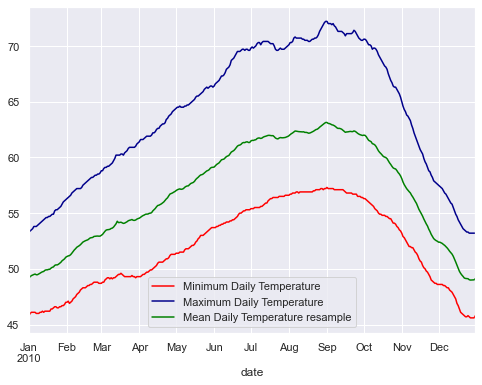

In [17]:
# resample daily
temps.resample('D').agg('min').temp.plot(label = 'Minimum Daily Temperature', color = 'red')
temps.resample('D').agg('max').temp.plot(label = 'Maximum Daily Temperature', color = 'darkblue')
temps.resample('D').mean().temp.plot(label = 'Mean Daily Temperature resample', color = 'green')
plt.legend()

### Seattle_Weather

from <br>
```vega_datasets import data```<br>
```data.seattle_weather()```<br>
**Use the dataset to answer the following questions:**

In [18]:
# import temps data frame
seattle = data.seattle_weather()
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [19]:
# Set date column as Index and sort the index:
seattle = seattle.set_index('date').sort_index()

#check value_counts 
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

**- Which year and month combination has the highest amount of precipitation?**

In [24]:
# Resample by average monthly precipitation and sort precipitation in descending order
seattle.resample('M').sum().sort_values(by = 'precipitation', ascending = False).head()   #---- December 2015

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60
2014-03-31,240.00,400.10,168.20,114.00
2015-11-30,212.60,290.50,104.40,106.40
2012-11-30,210.50,339.80,156.80,96.60
2012-03-31,183.00,296.20,88.00,131.70


**- Visualize the amount of monthly precipitation over time.**

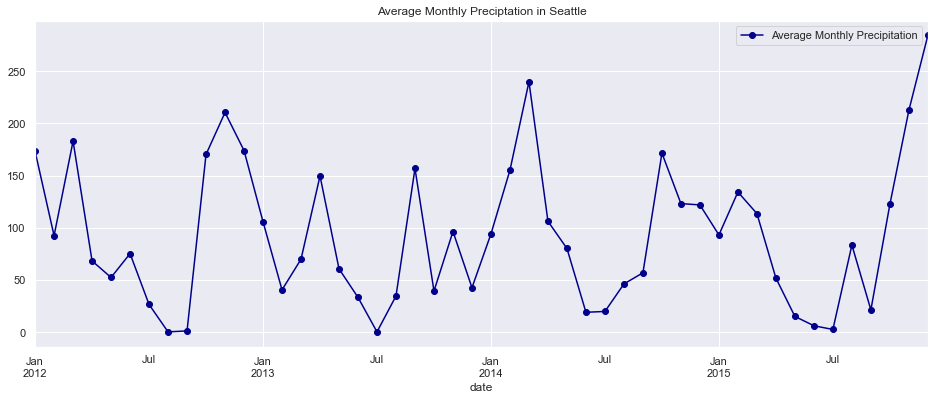

In [25]:
# visual average monthly preciptation by month
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('M').sum().precipitation.plot(label = 'Average Monthly Precipitation', color = 'darkblue', marker = 'o')
plt.title('Average Monthly Preciptation in Seattle')
plt.legend()
plt.show()

**- Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

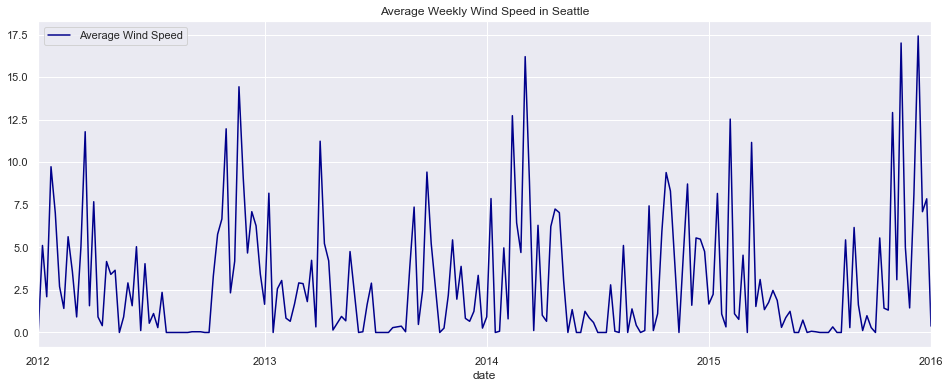

In [26]:
# visualize wind speed by week
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('W').mean().precipitation.plot(label = 'Average Wind Speed', color = 'darkblue')
plt.title('Average Weekly Wind Speed in Seattle')
plt.legend()
plt.show()

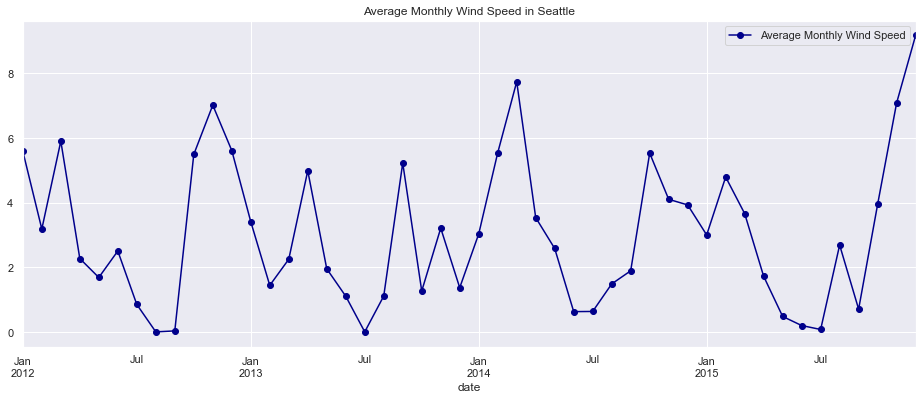

In [27]:
# visual wind speed by month
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('M').mean().precipitation.plot(label = 'Average Monthly Wind Speed', color = 'darkblue', marker = 'o')
plt.title('Average Monthly Wind Speed in Seattle')
plt.legend()
plt.show()

**- Which year-month combination is the windiest?**

In [29]:
# Resample by average monthly precipitation and sort precipitation in descending order
seattle.resample('M').mean().sort_values(by = 'wind', ascending = False).head()   # February 2014 had highest wind speeds

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.54,8.20,2.64,4.53
2015-12-31,9.18,8.38,3.83,4.34
2012-03-31,5.90,9.55,2.84,4.25
2014-11-30,4.10,11.03,4.51,3.98
2012-02-29,3.18,9.28,3.20,3.90


**- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [30]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [31]:
# make a new column 'is_sunny'
seattle['sunny_day'] = seattle.weather == 'sun'

In [32]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [37]:
# Resample by year to find year with most true values
seattle.sunny_day.resample('Y').mean().sort_values(ascending = False)   #2014

date
2014-12-31   0.58
2013-12-31   0.56
2015-12-31   0.49
2012-12-31   0.32
Name: sunny_day, dtype: float64

**- In which month does it rain the most?**

In [39]:
# Resample by month to find month with the highest sum of rainfall
seattle.precipitation.resample('M').sum().sort_values(ascending = False).head()   #December 2015

date
2015-12-31   284.50
2014-03-31   240.00
2015-11-30   212.60
2012-11-30   210.50
2012-03-31   183.00
Name: precipitation, dtype: float64

**- Which month has the most number of days with a non-zero amount of precipitation?**

In [44]:
# Which month has the most number of days with a non-zero amount of precipitation?
# we need to find whether or not it rained each day (non-zero precipitation)
# aggregate this by month

# create a column for month based on the index
seattle['month'] = seattle.index.month


# create a column for days with >0 rainfall
seattle['it_rained'] = seattle.precipitation > 0

In [47]:
# Which month has the most number of days with a non-zero amount of precipitation?
seattle.groupby('month').it_rained.sum().sort_values(ascending = False)   #December

month
12    81
3     73
2     73
11    71
1     66
10    61
4     59
6     37
9     35
5     34
8     22
7     11
Name: it_rained, dtype: int64

## Using Flights dataset

data.flights_20k()

In [49]:
# import flights data frame
flights = data.flights_20k()
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [59]:
# Set date column as Index and sort the index:
flights = flights.set_index('date').sort_index()
flights.head(2)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI


**Convert any negative delays to 0.**

In [60]:
# Define a function to change numbers < 0 to 0

def zero_out(x):
    if x < 0:
        x = 0
    return x
    

In [61]:
#apply function to flights.delay
flights.delay = flights.delay.apply(zero_out)


In [62]:
# ANOTHER WAY -- use np.where
flights.delay = np.where(flights.delay < 0, 0, flights.delay)

In [63]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


**Which hour of the day has the highest average delay?**

In [64]:
# make an hour column based on the index value
flights['hour'] = flights.index.hour
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [67]:
# groupby by 'hour' and look at mean delay:

flights.groupby('hour').delay.mean().sort_values(ascending = False) -- #3 am

hour
3    302.50
1    170.00
0    127.92
23    65.35
22    32.70
21    21.63
20    17.89
19    16.26
18    14.51
16    13.88
17    13.20
15    13.14
13    11.45
14    10.75
12     9.21
11     7.36
10     5.85
9      5.00
8      4.03
7      3.07
6      2.49
5      0.51
Name: delay, dtype: float64

**Does the day of the week make a difference in the delay amount?**

In [68]:
# make a day column based on the index value
flights['day'] = flights.index.day_name()
flights.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [70]:
# groupby by 'day' and look at mean delay:
flights.groupby('day').delay.mean()

day
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

**Does the month make a difference in the delay amount?**

In [71]:
# make a month column based on the index value
flights['month'] = flights.index.month
flights.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,1
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,1
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,1


In [72]:
# groupby by 'month' and look at mean delay:
flights.groupby('month').delay.mean()

month
1   11.30
2   12.31
3    9.88
Name: delay, dtype: float64

### Bonus  -- direct c/p from Ravinder's walkthrough

In [265]:
df = data.iowa_electricity().set_index('year').sort_index()

In [266]:
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [267]:
df.shape

(51, 2)

For each row, calculate the percentage of the year's total that energy source provided.   
Lineplot of generation over time, color by source  
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)  
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?  
Is the total generation increasing over time?  
How would you control for increasing consumption over time when considering how much energy is coming from each source?  
express each number as a % of the year's total


In [268]:
# what is total generation by year?
df.net_generation.resample('YS').sum()

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [269]:
# map the resampled data above (total by year) to the original df

df['year_total'] = df.index.map(df.net_generation.resample('YS').sum())

In [270]:
# For each row, calculate the percentage of the year's total that energy source provided.

df['percentage'] = df.net_generation/df.year_total

In [271]:
df.head()

,source,net_generation,year_total,percentage
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2001-01-01,Nuclear Energy,3853,40651,0.094782
2001-01-01,Renewables,1437,40651,0.035350
2002-01-01,Fossil Fuels,35991,42528,0.846290
2002-01-01,Nuclear Energy,4574,42528,0.107553


<AxesSubplot:xlabel='year', ylabel='net_generation'>

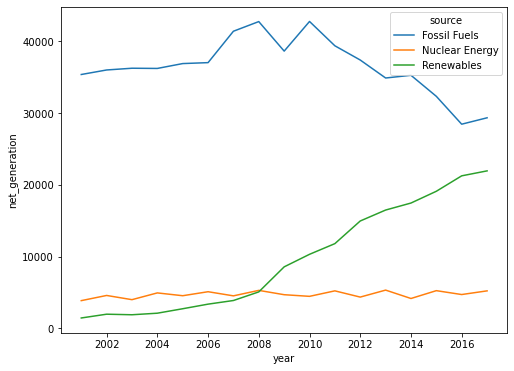

In [118]:
# Lineplot of generation over time, color by source:

sns.lineplot(data = df, x = 'year', y = 'net_generation', ci = 0, hue = 'source')

In [272]:
# Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

# lets make a new column called 'c_year' which is just the year

df['c_year'] = df.index.year

In [273]:
df.head()

,source,net_generation,year_total,percentage,c_year
year,,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868,2001
2001-01-01,Nuclear Energy,3853,40651,0.094782,2001
2001-01-01,Renewables,1437,40651,0.035350,2001
2002-01-01,Fossil Fuels,35991,42528,0.846290,2002
2002-01-01,Nuclear Energy,4574,42528,0.107553,2002


In [274]:
# use pivot_table to have years as columns:

df_pivot = df.pivot_table(index = ['source'], columns= 'c_year', values = 'net_generation' )

In [275]:
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


<AxesSubplot:xlabel='year'>

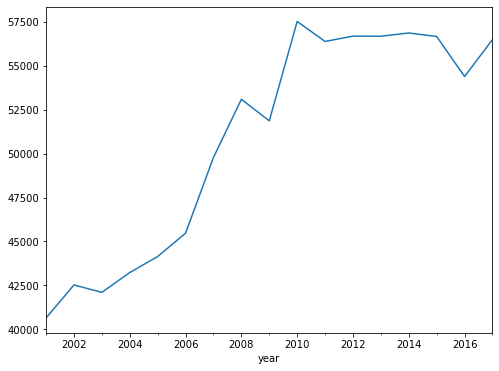

In [276]:
# Is the total generation increasing over time?

df.net_generation.resample('YS').sum().plot()

In [140]:
# How would you control for increasing consumption over time when considering how much energy is coming from each source?
# express each number as a % of the year's total

# lets normalize the dataframe (columnwise):

cols = list(df_pivot.columns)
df_pivot[cols] = df_pivot[cols] / df_pivot[cols].sum()

In [146]:
# normalized dataframe
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,0.869868,0.846290,0.860522,0.837381,0.835497,0.813978,0.831472,0.804996,0.744712,0.743362,0.698249,0.659532,0.615370,0.620009,0.570473,0.522922,0.519318
Nuclear Energy,0.094782,0.107553,0.094711,0.114002,0.102798,0.112045,0.090783,0.099499,0.090225,0.077397,0.092512,0.076700,0.093894,0.073029,0.092546,0.086482,0.092322
Renewables,0.035350,0.046158,0.044767,0.048617,0.061706,0.073978,0.077745,0.095505,0.165063,0.179242,0.209239,0.263767,0.290736,0.306962,0.336981,0.390596,0.388360


<AxesSubplot:xlabel='c_year'>

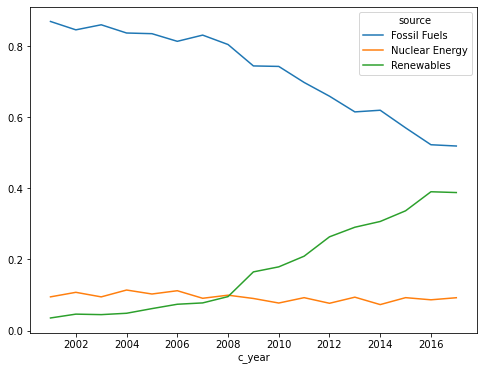

In [145]:
# transpose the dataframe above and plot the data for three sources
df_pivot.T.plot()

Takeaways:
- Fossil fuel use (as % of total) is decreasing.
- Nuclear energy is flat
- Renewables use is increasing
